<h2>HEART DISEASE ANALYSIS</h2></br>
Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.</br>

From the dataset if we create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients.</br>

<h3>About the Datset</h3>
This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

Attribute Information </br>
• Sex: male or female(Nominal)</br>
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age
is continuous) Behavioral</br>
• Current Smoker: whether or not the patient is a current smoker (Nominal)</br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one
can have any number of cigarettes, even half a cigarette.)</br>
Medical( history)</br>
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)</br>
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)</br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)</br>
• Diabetes: whether or not the patient had diabetes (Nominal)</br>
Medical(current)</br>
• Tot Chol: total cholesterol level (Continuous)</br>
• Sys BP: systolic blood pressure (Continuous)</br>
• Dia BP: diastolic blood pressure (Continuous)</br>
• BMI: Body Mass Index (Continuous)</br>
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet
considered continuous because of large number of possible values.)</br>
• Glucose: glucose level (Continuous)</br>
Predict variable (desired target)</br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)</br>

In [1]:
# Importing the basic neccesary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the Dataset

data = pd.read_csv("framingham.csv")

In [4]:
# Top 5 rows of the dataset

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#Random 5 Rows from the dataset

data.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3405,1,52,4.0,0,0.0,0.0,0,0,0,225.0,132.0,88.0,23.35,72.0,69.0,0
2044,0,40,3.0,1,20.0,0.0,0,0,0,237.0,112.5,77.5,23.58,75.0,84.0,0
263,1,64,1.0,0,0.0,0.0,0,1,0,217.0,147.0,87.0,29.73,77.0,NaN,0
411,0,60,3.0,0,0.0,0.0,0,1,0,285.0,156.0,100.0,23.02,80.0,85.0,0
1775,0,41,1.0,0,0.0,0.0,0,0,0,197.0,121.0,84.0,23.07,80.0,NaN,0


In [6]:
# Shape of the data

data.shape

(4238, 16)

In [7]:
# statistics of the data
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<h2>Data Preprocessing</h2></br>
<h3>Handling Missing Data</h3>

In [8]:
# Checking for missing data in the dataset

data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<h4> Visualizing the missing data<h4>

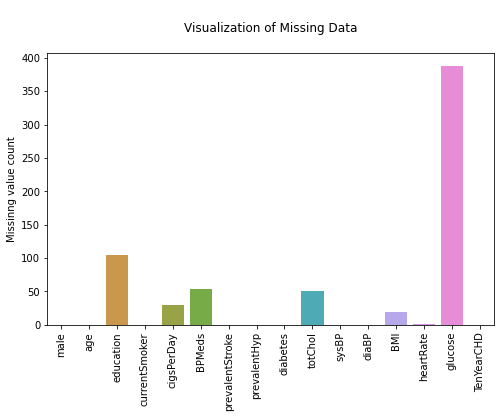

In [9]:
# pip install missingno
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=data.columns, y=data.isnull().sum()) 
plt.xticks (rotation=90) 
plt.ylabel("Missinng value count")
plt.title("\nVisualization of Missing Data\n")
plt.show()

<h4>Missing Values in Educational Column</h4>

<AxesSubplot:xlabel='education', ylabel='count'>

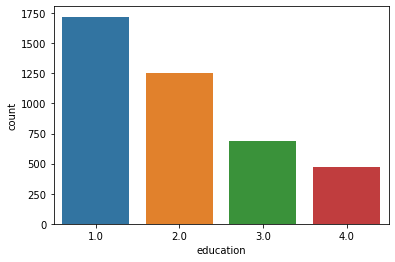

In [10]:
sns.countplot(x = data['education'])

In [11]:
# Handling missing Data in Educational Column,
# Guessing the education of person using his/her medical data does not make sense, hence we can fill up the missing data
# using mode.

data['education'].fillna(data['education'].mode()[0],inplace=True)

<h4>Missing Values in Cigars per day Column</h4>

<AxesSubplot:xlabel='cigsPerDay'>

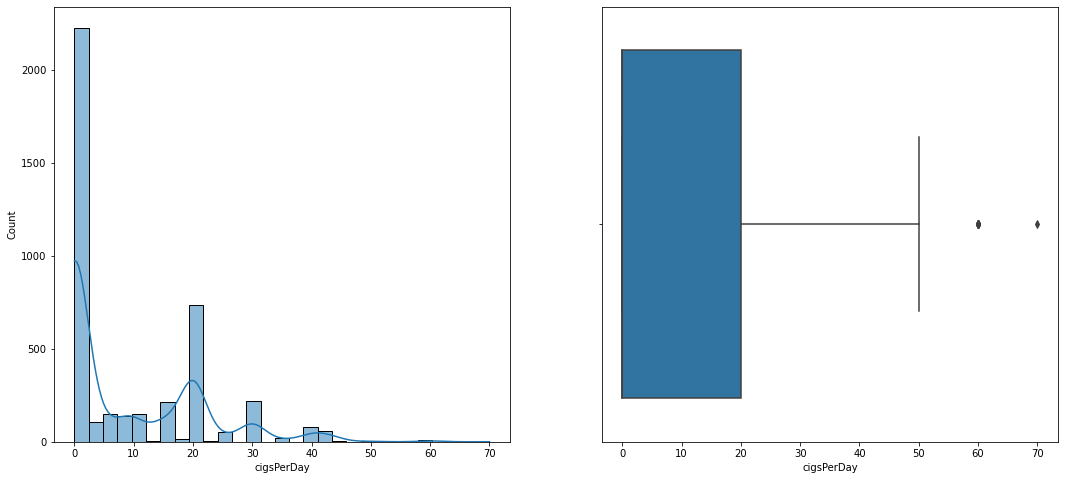

In [12]:
fig,my_grid=plt.subplots(nrows=1,ncols=2,figsize=(18,8))
sns.histplot(x=data['cigsPerDay'],data=data,kde=True,ax=my_grid[0])
sns.boxplot(x=data['cigsPerDay'],data=data,ax=my_grid[1])

In [13]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# the effect of outliers.
# If the "current smoker column" is zero, which means the person is not a smoker right now, we can replace the correspondong NaN
# values in "cigars per day" column with zero

In [14]:
# First index of null values present in the cigsPerDay column
index=data['cigsPerDay'][data['cigsPerDay'].isna()].index
index

Int64Index([ 131,  139, 1046, 1292, 1347, 1451, 1497, 1610, 1625, 1870, 1963,
            1980, 2405, 2513, 2542, 3021, 3034, 3094, 3106, 3108, 3156, 3177,
            3309, 3432, 3579, 3715, 3847, 3924, 3942],
           dtype='int64')

In [15]:
# next check those peoples are current smokers or not, for that we will check the corresponding values in the currentSmoker columns
for i in index:
    print(data['currentSmoker'].loc[i])


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [16]:
# As we can see all the missing values in the "Cigsperday" column have the "Current smoker" column value as 1
# Now we can fill the null values using the median of "Cigs per day"
# But we don't have to use the entire "Cigs per day" column, we can use the values where the "Current smoker" values is 1

In [17]:
data_currentsmoker_yes = data[data['currentSmoker'] == 1]

In [18]:
# Median and mode of "cigsperday" where "current smoker" is 1

print(data_currentsmoker_yes['cigsPerDay'].median())

20.0


In [19]:
# Now we can replace the NaN values in "cigsperday" using 20

data['cigsPerDay'].fillna(20,inplace=True)

In [20]:
data.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<h4>Missing Missing Values in BP Meds Column</h4>

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

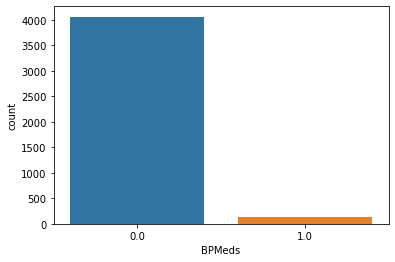

In [21]:
sns.countplot(x = data['BPMeds'])

In [22]:
# We can fill the missing values in BP Meds using data in Systolic and Diastolic BP columns
# If the values of both bp columns are over a threshold value, we can consider as the person is taking bp medicine
# Doctors reccomend bp medicines for patients at high blood pressure stage 2(140/90) and hypertensive crisis(180/120)

In [23]:
BP_nullindex=data[data['BPMeds'].isna()].index
BP_nullindex

Int64Index([  49,   77,  193,  245,  314,  395,  421,  765,  769,  797,  998,
            1002, 1044, 1104, 1122, 1177, 1206, 1284, 1301, 1566, 1573, 1616,
            1721, 1857, 1861, 1913, 1983, 1985, 1986, 2002, 2074, 2120, 2173,
            2181, 2367, 2608, 2645, 2738, 2835, 2943, 3226, 3313, 3373, 3375,
            3526, 3644, 3737, 3791, 3816, 4008, 4139, 4162, 4235],
           dtype='int64')

In [24]:
for i in BP_nullindex:
    if (data["sysBP"][i]>140 or data['diaBP'][i] > 90):
        data.loc[i,'BPMeds']=1.0
    else:
        data.loc[i,'BPMeds']=0.0

In [25]:
data.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<h4>Missing Values in Glucose</h4>

<AxesSubplot:xlabel='glucose'>

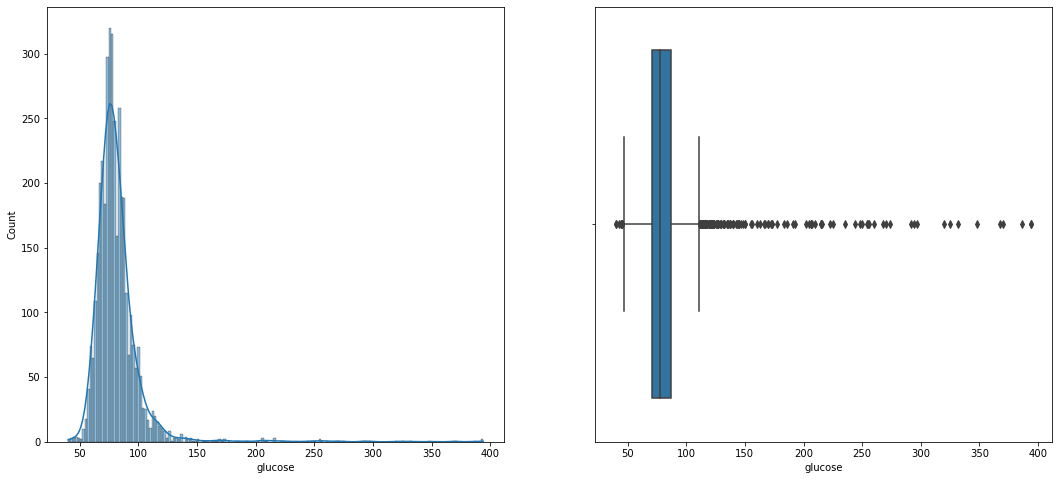

In [28]:
fig,my_grid=plt.subplots(nrows=1,ncols=2,figsize=(18,8))
sns.histplot(x=data["glucose"],kde=True,data=data,ax=my_grid[0])
sns.boxplot(x=data["glucose"],data=data,ax=my_grid[1])

In [29]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# effect of outliers.
# The glucose value of a person is related to whether he/she has diabetes or not
# We can groupby the median of glucose using diabetes 

In [30]:
data.groupby("diabetes").median()["glucose"]

diabetes
0     78.0
1    145.0
Name: glucose, dtype: float64

In [31]:
def impute_glucose(cols):
    dia=cols[0]
    glu=cols[1]
    if pd.isnull(glu):
        if dia==0:
            return 78
        else:
            return 145
    else:
        return glu
    
data["glucose"]=data[["diabetes","glucose"]].apply(impute_glucose,axis=1)
    

In [32]:
data.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

<h4>Missing Values in BMI</h4>

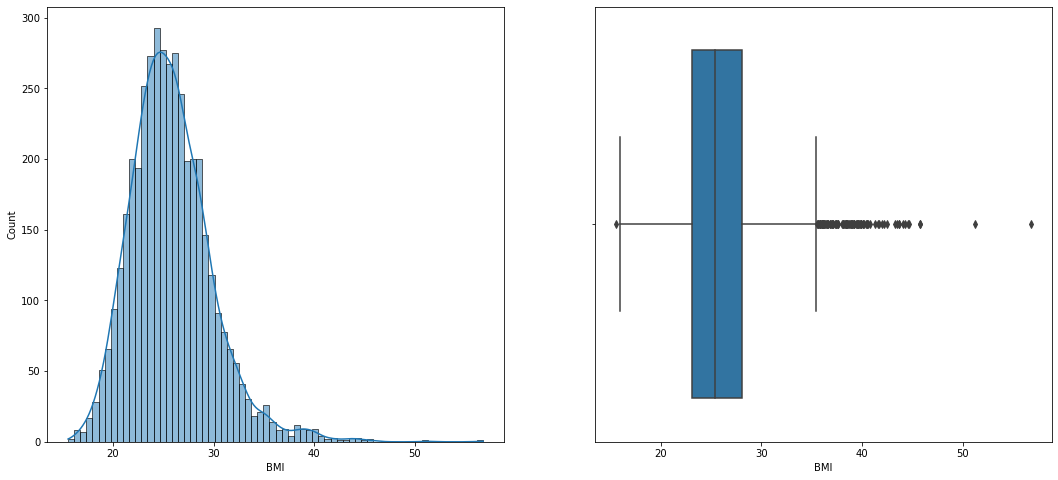

In [34]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['BMI'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['BMI'],data=data,ax=my_grid[1])

In [35]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# effect of outliers.
# We can fill the missing values uaing the median of the column

In [36]:
data['BMI'].fillna(data['BMI'].median(),inplace=True)

<h4>Missing Values in Cholestrol</h4>

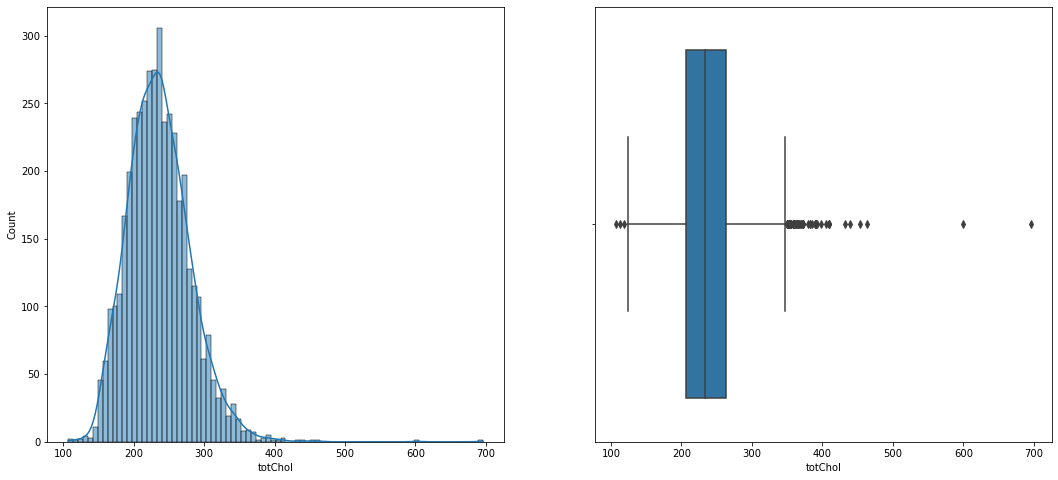

In [37]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['totChol'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['totChol'],data=data,ax=my_grid[1])

In [38]:
# From the graph we can see that there are outliers, so we have to choose a method to fill the null values that does not have
# effect of outliers.
# We can fill the missing values uaing the median of the column

In [39]:
data['totChol'].fillna(data['totChol'].median(),inplace=True)

<h4>Missing Values in Heart Rate</h4>

In [41]:
# There is only 1 missing value in this column,we can use mode of the column to fill null values
data['heartRate'].fillna(data["heartRate"].mode()[0],inplace=True)

In [42]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<h3>Outlier Handling</h3>

In [44]:
# Creating a new dataframe to select all the contionus column 
data_outliers = data[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate', 'glucose']].copy()

Text(0.5, 0, 'Continous Features')

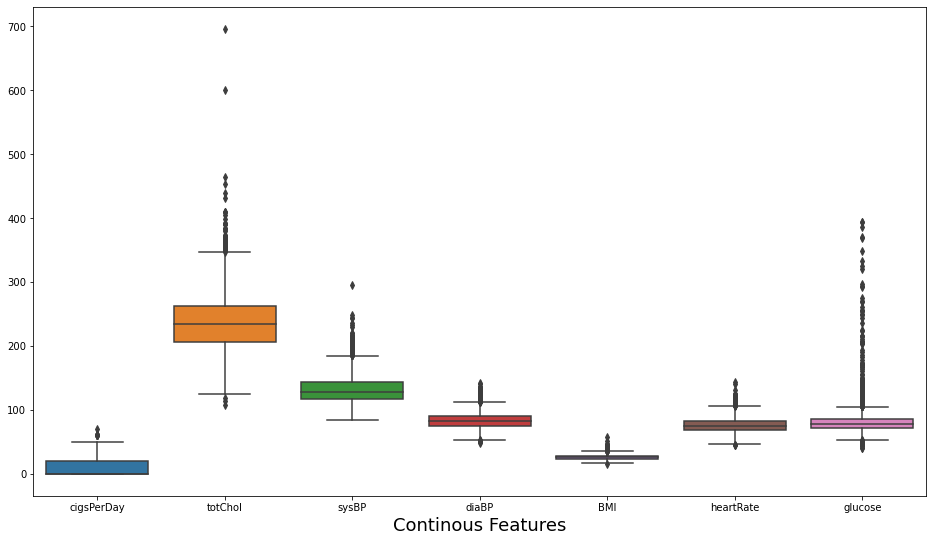

In [45]:
plt.figure(figsize=(16,9))
sns.boxplot(data=data_outliers)
plt.xlabel("Continous Features",fontsize=18)

Theoretically, the outliers in each of these column can be handled using a number of methods</br>
But here,most our columns are health related and it is very feasible for these columns to have these extreme values</br>

<h4>Handling Outliers in ciggrates per day column</h4>

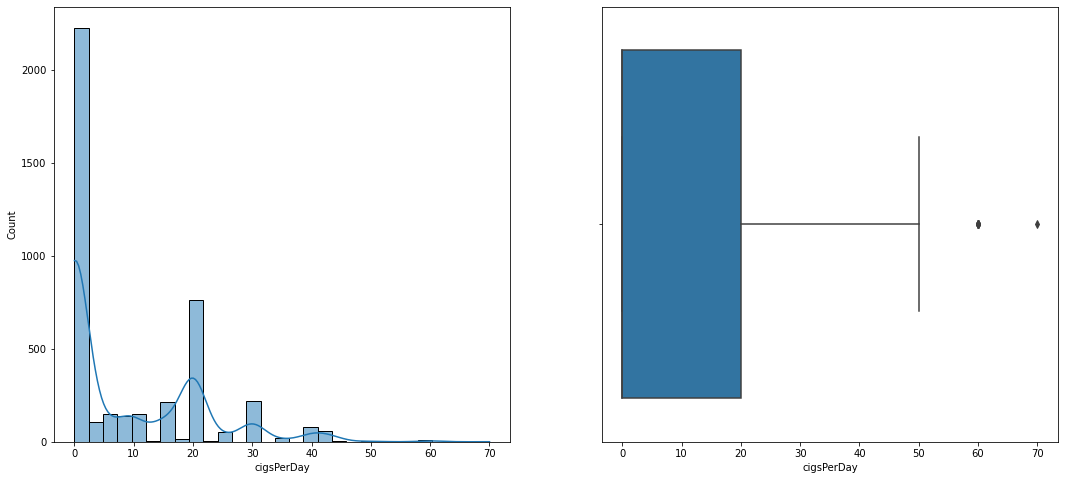

In [47]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['cigsPerDay'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['cigsPerDay'],data=data,ax=my_grid[1])

In [48]:
# We can cap the outliers using IQR method

In [49]:
Q1 = data['cigsPerDay'].quantile(0.25)
Q3 = data['cigsPerDay'].quantile(0.75)
IQR = Q3-Q1
LL=Q1-1.5*IQR #LL - Lower Limit
UL=Q3+1.5*IQR #UL - Upper Limit

In [50]:
# removing the outliers
data['cigsPerDay'] = np.where(data['cigsPerDay']>UL,UL,np.where(data['cigsPerDay']<LL,LL,data['cigsPerDay']))

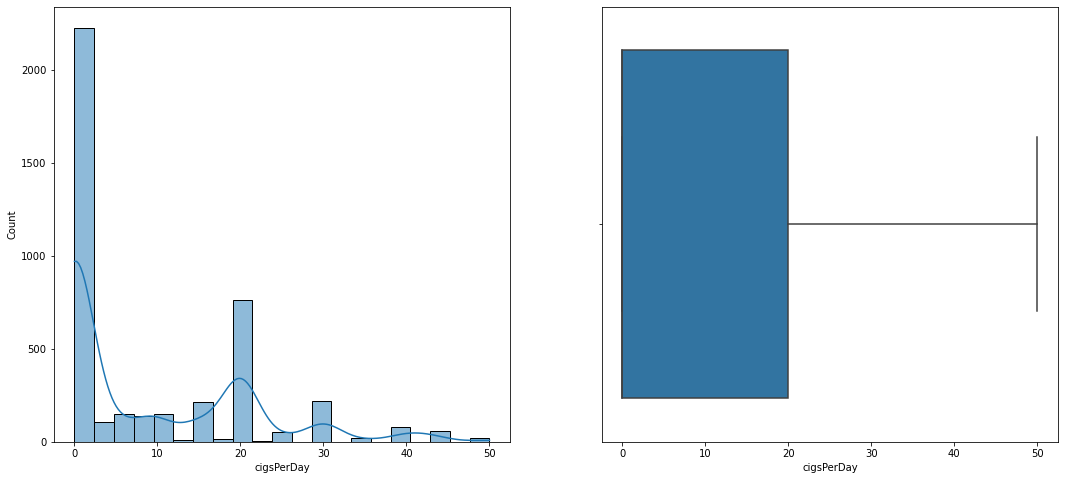

In [51]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=data['cigsPerDay'],kde=True,data=data,ax=my_grid[0])
g2 = sns.boxplot(x=data['cigsPerDay'],data=data,ax=my_grid[1])

<h3>Feature Engineering</h3>

Mean Arterial Pressure:</br>
According to the article, we can generate a mean arterial pressure column using Systolic and Diastolic blood pressure (SBP and DBP) columns
The formula to find the mean arterial pressure,MAP = (SBP + 2* DBP)/3

In [52]:
data['MAP'] = (data['sysBP'] + (2* data['diaBP']))/3

Weight:</br>
According to the above article,We can generate a weight classification column using the BMI of a person
Major BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more)

In [53]:
def Weight(a):
    if a<18.5:
        return "Underweight"
    if 18.5<=a<24.9:
        return "Normal"
    elif 24.9<=a<29.9:
        return "Overweight"
    elif a>29.9:
        return "Obese"

In [54]:
data["Weight"]=data["BMI"].apply(lambda x: Weight(x))

In [55]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,Weight
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.000000,Overweight
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.333333,Overweight
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.833333,Overweight
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.333333,Overweight
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.333333,Normal


<h3>Exploratory Data Analysis</h3>

<h4>Univariate Analysis<h4>

In [56]:
sns.set(style="whitegrid",palette='Set2')

Distribution of boolean variables
 “1” means “Yes”, “0” means “No”


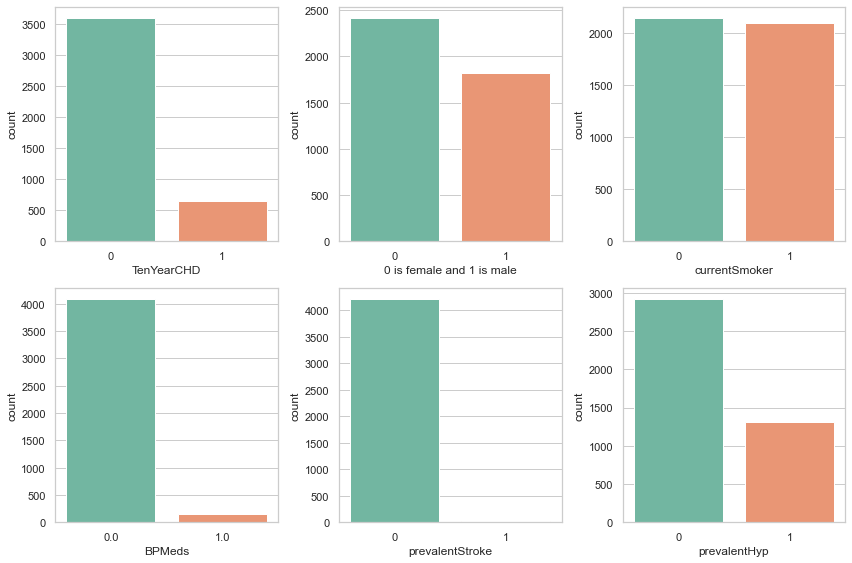

In [57]:
print("Distribution of boolean variables")
print(' “1” means “Yes”, “0” means “No”')
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(data.TenYearCHD,ax=axes[0,0])
sns.countplot(data.male,ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(data.currentSmoker,ax=axes[0,2])
sns.countplot(data.BPMeds,ax=axes[1,0])
sns.countplot(data.prevalentStroke,ax=axes[1,1])
sns.countplot(data.prevalentHyp,ax=axes[1,2])
plt.tight_layout()

Distribution of continuous variables


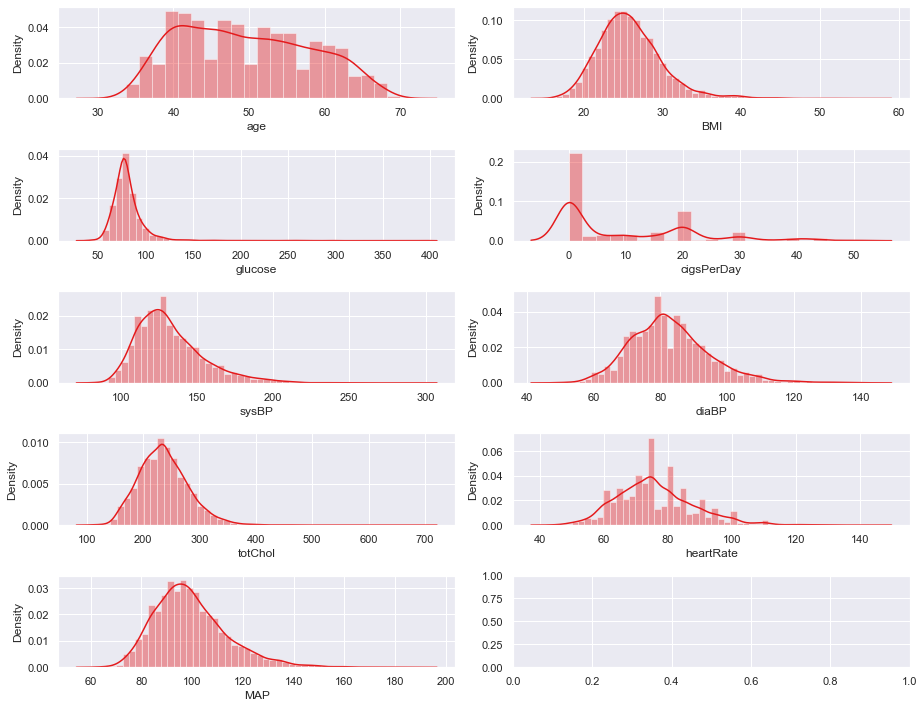

In [58]:
sns.set(style="darkgrid",palette='Set1')
print("Distribution of continuous variables")
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(13,10))
sns.distplot(data.age,ax=axes[0,0])
sns.distplot(data.BMI,ax=axes[0,1])
sns.distplot(data.glucose,ax=axes[1,0])
sns.distplot(data.cigsPerDay,ax=axes[1,1])
sns.distplot(data.sysBP,ax=axes[2,0])
sns.distplot(data.diaBP,ax=axes[2,1])
sns.distplot(data.totChol,ax=axes[3,0])
sns.distplot(data.heartRate,ax=axes[3,1])
sns.distplot(data.MAP,ax=axes[4,0])
plt.tight_layout()

<h3>Bivariate Analysis</h3>

Text(0.5, 1.0, 'Coronary Heart Disease in Men and Women')

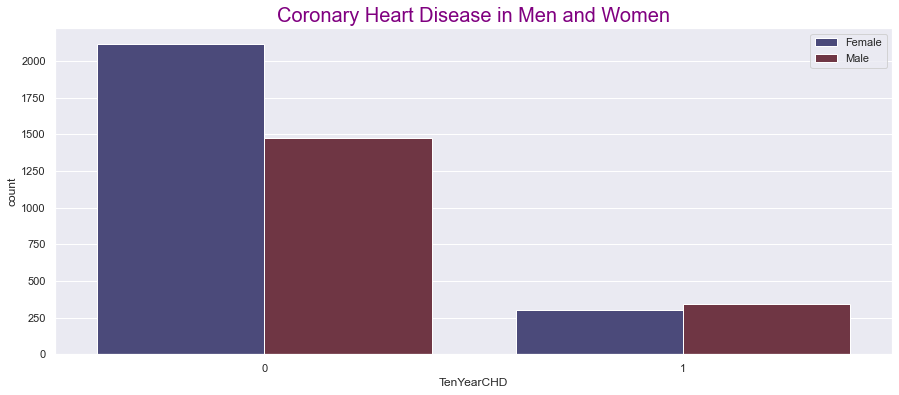

In [61]:
# Coronary Hear Disease in Men and Women
plt.figure(figsize=(15,6))
x=sns.countplot(x=data['TenYearCHD'],hue=data['male'],data=data,palette='icefire')
L=plt.legend()
L.get_texts()[0].set_text('Female')
L.get_texts()[1].set_text('Male')
plt.title("Coronary Heart Disease in Men and Women",fontsize=20,color='purple')

Men are most susceptible to CHD's tham women

Text(0.5, 1.0, 'Level of Education vs CHD')

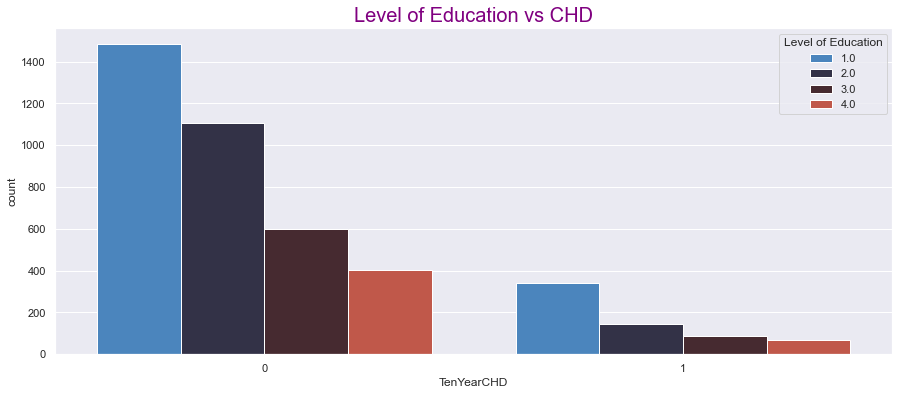

In [62]:
# Level of Education vs CHD
plt.figure(figsize=(15,6))
x=sns.countplot(x=data['TenYearCHD'],hue=data['education'],data=data,palette='icefire')
L=plt.legend()
L.set_title('Level of Education')
plt.title("Level of Education vs CHD",fontsize=20,color='purple')

Coronary Heart diseases are most found among the people with lesser level of education

Text(0.5, 1.0, 'Age,Cholestrol vs CHD')

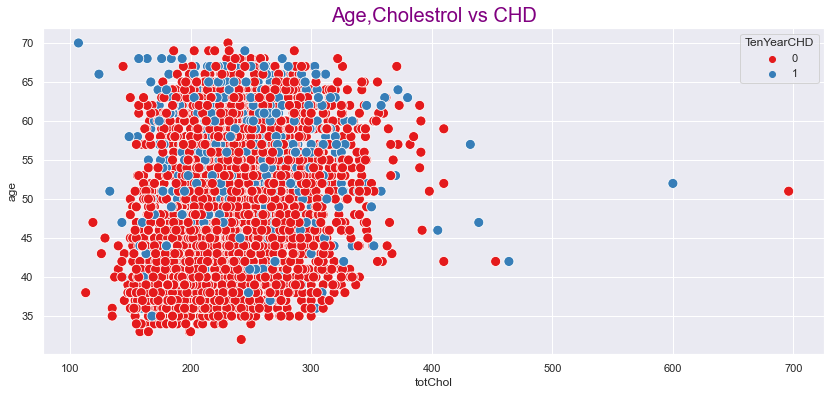

In [64]:
# Age,Cholestrol vs CHD
plt.figure(figsize=(14,6))
pt=sns.scatterplot(y=data['age'],x=data['totChol'],hue=data['TenYearCHD'],s=100)
plt.title("Age,Cholestrol vs CHD",fontsize=20,color='purple')

Coronary Heart Disease are most in people above 50 years old and cholestrol level above 200

Text(0.5, 0.98, 'MAP,BMI,Diabetes vs CHD')

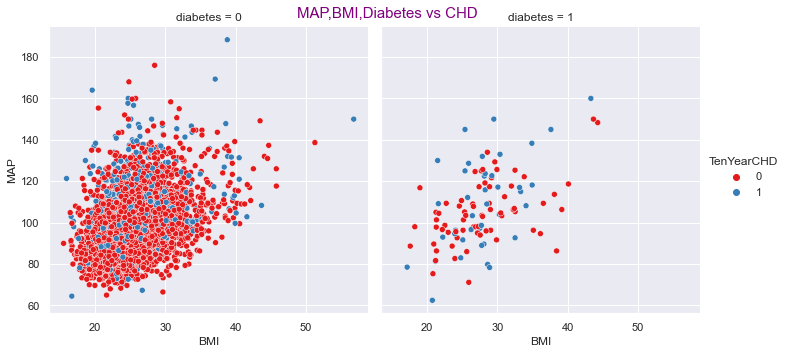

In [66]:
# MAP,BMI,Diabetes vs CHD
g = sns.relplot(y=data['MAP'],x=data['BMI'],hue=data['TenYearCHD'],col=data['diabetes'],height=5,)
g.fig.suptitle("MAP,BMI,Diabetes vs CHD",color ='purple',fontsize=15)

Body Mass Index and Pressure has a linear relation with Cornonary Heart Disease.</br>
People with diabetes are in higher risk of CHD, even if their BMI and MAP are optimal.

Text(0.5, 1.0, 'Distribution of Cholestrol among different Weight categories')

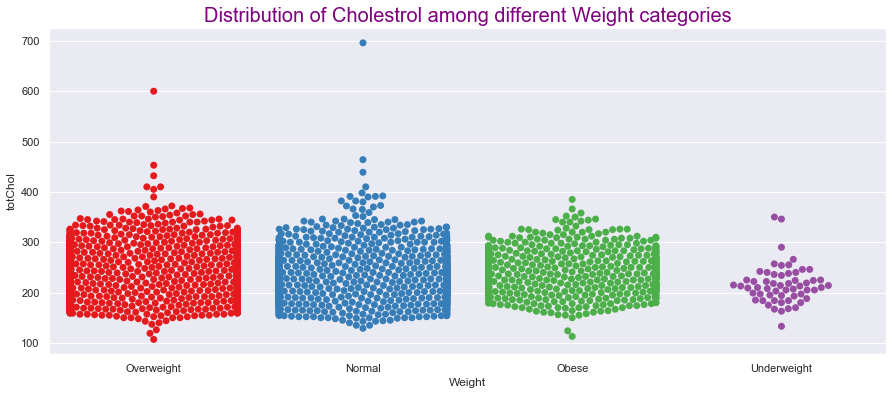

In [68]:
# Distribution of Cholestrol among different Weight categories
plt.figure(figsize=(15,6))
sns.swarmplot(x=data['Weight'],y=data['totChol'],data=data,size=7)
plt.title("Distribution of Cholestrol among different Weight categories",fontsize=20,color='purple')

<h3>Encoding</h3>

In [70]:
# Only the weight column in our data requires enoding

In [71]:
data['Weight'] = data['Weight'].map({'Underweight': 1, 'Normal': 2,'Overweight':3,'Obese':4})

In [72]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,Weight
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.000000,3
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.333333,3
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.833333,3
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.333333,3
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.333333,2


<h3>Feature Reduction</h3>

In [73]:
corr = data.corr()

<AxesSubplot:>

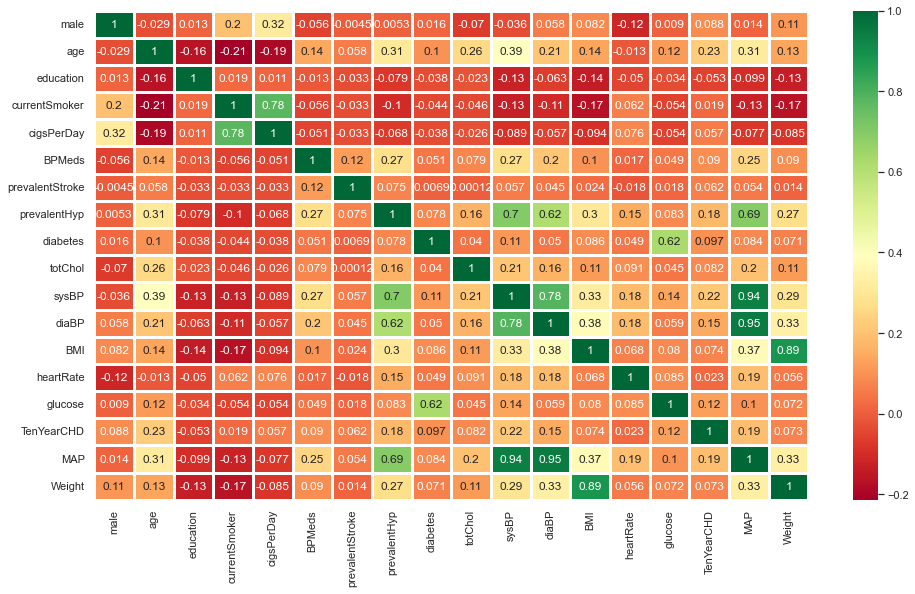

In [74]:
plt.figure(figsize=(16,9))
sns.heatmap(data=corr,cmap='RdYlGn',annot=True,linewidths=3)

In [75]:
# Due to their high correltaion we can drop sysBP,diaBP and Current Smoker Columns

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
data['MAP'].dtypes

dtype('float64')

In [78]:
df_con=['cigsPerDay', 'totChol','BMI','heartRate', 'glucose', 'MAP','age']
stds=StandardScaler()
for i in df_con:
    data[i]=pd.DataFrame(stds.fit_transform(data[[i]]))

In [79]:

data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,Weight
count,4238.000000,4.238000e+03,4238.000000,4238.000000,4.238000e+03,4238.000000,4238.000000,4238.000000,4238.000000,4.238000e+03,4238.000000,4238.000000,4.238000e+03,4.238000e+03,4.238000e+03,4238.000000,4.238000e+03,4238.000000
mean,0.429212,1.126334e-16,1.954696,0.494101,1.463619e-16,0.034214,0.005899,0.310524,0.025720,-8.262490e-17,132.352407,82.893464,5.223654e-16,-1.380706e-16,3.460606e-16,0.151958,-4.002275e-16,2.672015
std,0.495022,1.000118e+00,1.018510,0.500024,1.000118e+00,0.181801,0.076587,0.462763,0.158316,1.000118e+00,22.038097,11.910850,1.000118e+00,1.000118e+00,1.000118e+00,0.359023,1.000118e+00,0.713023
min,0.000000,-2.051644e+00,1.000000,0.000000,-7.673045e-01,0.000000,0.000000,0.000000,0.000000,-2.926062e+00,83.500000,48.000000,-2.520588e+00,-2.651309e+00,-1.815943e+00,0.000000,-2.554502e+00,1.000000
25%,0.000000,-8.849392e-01,1.000000,0.000000,-7.673045e-01,0.000000,0.000000,0.000000,0.000000,-6.924178e-01,117.000000,75.000000,-6.682630e-01,-6.552620e-01,-4.213041e-01,0.000000,-6.843293e-01,2.000000
50%,0.000000,-6.824590e-02,2.000000,0.000000,-7.673045e-01,0.000000,0.000000,0.000000,0.000000,-6.068012e-02,128.000000,82.000000,-9.831699e-02,-7.308163e-02,-1.598093e-01,0.000000,-1.417483e-01,3.000000
75%,1.000000,7.484475e-01,3.000000,1.000000,9.288339e-01,0.000000,0.000000,1.000000,0.000000,5.710575e-01,144.000000,89.875000,5.496281e-01,5.922673e-01,1.452680e-01,0.000000,5.364778e-01,3.000000
max,1.000000,2.381834e+00,4.000000,1.000000,3.473041e+00,1.000000,1.000000,1.000000,1.000000,1.036299e+01,295.000000,142.500000,7.615608e+00,5.582384e+00,1.361225e+01,1.000000,6.161426e+00,4.000000


<h3>Modeling</h3>

Splitting the dataset to X and y

In [85]:
X = data.drop(['TenYearCHD'],axis=1)
y = data['TenYearCHD']

In [86]:
# Splitting to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.2)

<h4>a. Logistic Regression<h4>

In [87]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [88]:
LR.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_predicted = LR.predict(X_test)

In [90]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [91]:
# Metrics of the model
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8537735849056604
f1 score is 0.1733333333333333


In [92]:
cm

array([[711, 122],
       [  2,  13]], dtype=int64)

<h4>b. KNN</h4>

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# To find the optimal value of k,

accuracy = []
neighbors = np.arange(3,20)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_predicted = classifier.predict(X_test)
    acc = accuracy_score(y_predicted,y_test)
    accuracy.append(acc)

Text(0, 0.5, 'Accuracy')

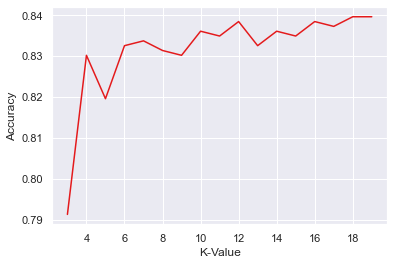

In [96]:
sns.lineplot(x=neighbors,y=accuracy)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")

In [97]:
# 17 is the best value of k

In [98]:
classifier = KNeighborsClassifier(n_neighbors=17, metric='minkowski')
classifier.fit(X_train,y_train)
y_predicted= classifier.predict(X_test)

In [99]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8372641509433962
f1 score is 0.04166666666666667


In [100]:
cm

array([[707, 132],
       [  6,   3]], dtype=int64)

<h4>c. SVC<H4>

In [101]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)

In [102]:
svc.fit(X_train,y_train)
y_predicted = svc.predict(X_test)

In [103]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8408018867924528
f1 score is 0.0


In [104]:
cm

array([[713, 135],
       [  0,   0]], dtype=int64)

<H4>d. Random Forest</H4>

In [106]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [107]:
forest.fit(X_train,y_train)
y_predicted = forest.predict(X_test)

In [108]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8466981132075472
f1 score is 0.15584415584415584


In [109]:
cm

array([[706, 123],
       [  7,  12]], dtype=int64)

<H4>e. Decision Tree</H4>

In [111]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [112]:
tree.fit(X_train,y_train)
y_predicted = tree.predict(X_test)

In [113]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.7688679245283019
f1 score is 0.2949640287769784


In [114]:
cm

array([[611,  94],
       [102,  41]], dtype=int64)

<H3>Hyper Parameter Tuning</H3>

In [116]:
LR = LogisticRegression(C=1)  #Hyperparameter tuning

In [117]:
LR.fit(X_train,y_train)
y_predicted = LR.predict(X_test)

In [118]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.8537735849056604
f1 score is 0.1733333333333333


In [119]:
cm

array([[711, 122],
       [  2,  13]], dtype=int64)

Logistic Regression is the best model for our data, it has an accuracy of 85%</br>

Our Model also have very few false negatives, which means very very few patient will get a wrong result saying they
don't have the risk of CHD